In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy import stats

warnings.filterwarnings("ignore")

In [57]:
# Load dataset
data = pd.read_csv('salary_prediction_data.csv')

In [58]:
data.head()

,Education,Experience,Location,Job_Title,Age,Gender,Salary
0,High School,8,Urban,Manager,63,Male,84620.053665
1,PhD,11,Suburban,Director,59,Male,142591.255894
2,Bachelor,28,Suburban,Manager,61,Female,97800.255404
3,High School,29,Rural,Director,45,Male,96834.671282
4,PhD,25,Urban,Analyst,26,Female,132157.786175


In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Education   1000 non-null   object 
 1   Experience  1000 non-null   int64  
 2   Location    1000 non-null   object 
 3   Job_Title   1000 non-null   object 
 4   Age         1000 non-null   int64  
 5   Gender      1000 non-null   object 
 6   Salary      1000 non-null   float64
dtypes: float64(1), int64(2), object(4)
memory usage: 54.8+ KB


In [60]:
data.duplicated().sum()

0

In [61]:
# Feature Engineering
data['Gender'] = data['Gender'].replace({'Male': 1, 'Female': 2})
data['Education'] = data['Education'].replace({'High School': 1, 'Bachelor': 2, 'PhD': 3, 'Master': 4})
data['Location'] = data['Location'].replace({'Suburban': 1, 'Rural': 2, 'Urban': 3})
data['Job_Title'] = data['Job_Title'].replace({'Director': 1, 'Analyst': 2, 'Manager': 3, 'Engineer': 4})

In [62]:
# Summary
data.describe()

,Education,Experience,Location,Job_Title,Age,Gender,Salary
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2.478000,14.771000,1.965000,2.424000,42.377000,1.484000,105558.404239
std,1.114791,8.341111,0.808968,1.119588,13.609412,0.499994,28256.972075
min,1.000000,1.000000,1.000000,1.000000,20.000000,1.000000,33510.510669
25%,1.000000,7.000000,1.000000,1.000000,30.000000,1.000000,85032.141517
50%,2.000000,15.000000,2.000000,2.000000,43.000000,1.000000,104314.518315
75%,3.000000,22.000000,3.000000,3.000000,55.000000,2.000000,126804.047524
max,4.000000,29.000000,3.000000,4.000000,64.000000,2.000000,193016.602150


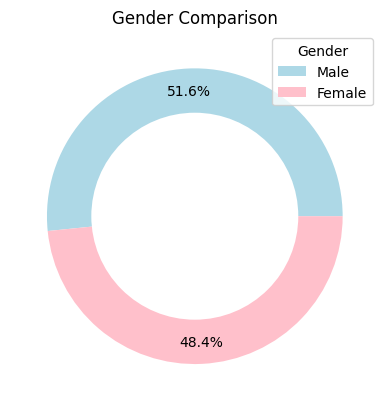

In [63]:
# Compare the gender
plt.pie(data['Gender'].value_counts(), colors=['lightblue', 'pink'], pctdistance=0.85, autopct='%1.1f%%')
plt.gca().add_artist(plt.Circle((0, 0), 0.70, fc='white'))

plt.title('Gender Comparison')
plt.legend(['Male', 'Female'], loc='upper right', title='Gender')

plt.show()

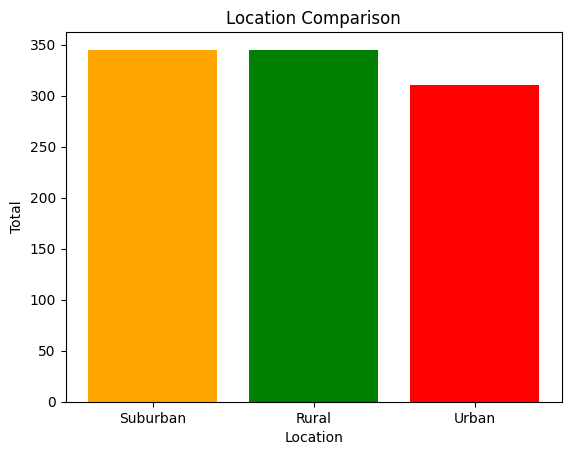

In [64]:
# Compare the location
plt.bar(['Suburban', 'Rural', 'Urban'], data['Location'].value_counts(), color=['orange', 'green', 'red'])
plt.title('Location Comparison')
plt.xlabel('Location')
plt.ylabel('Total')
plt.show()

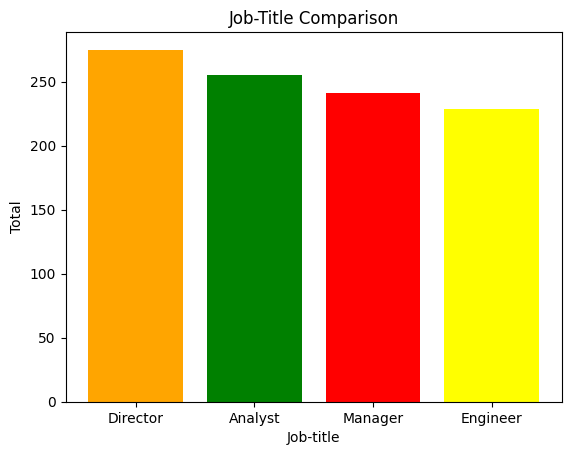

In [65]:
# Compare the job title
plt.bar(['Director', 'Analyst', 'Manager', 'Engineer'], data['Job_Title'].value_counts(), color=['orange', 'green', 'red', 'yellow'])
plt.title('Job-Title Comparison')
plt.xlabel('Job-title')
plt.ylabel('Total')
plt.show()

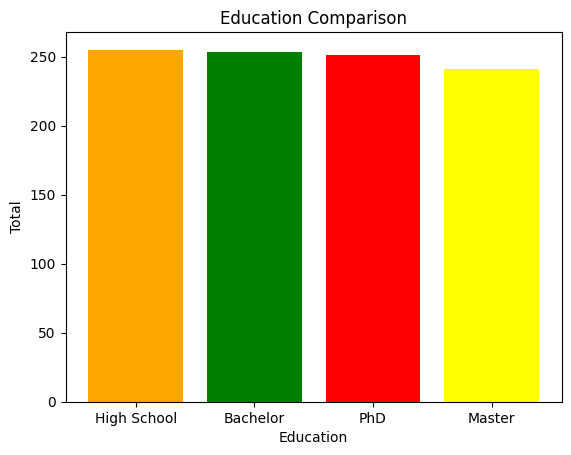

In [66]:
# Compare the education
plt.bar(['High School', 'Bachelor', 'PhD', 'Master'], data['Education'].value_counts(), color=['orange', 'green', 'red', 'yellow'])
plt.title('Education Comparison')
plt.xlabel('Education')
plt.ylabel('Total')
plt.show()

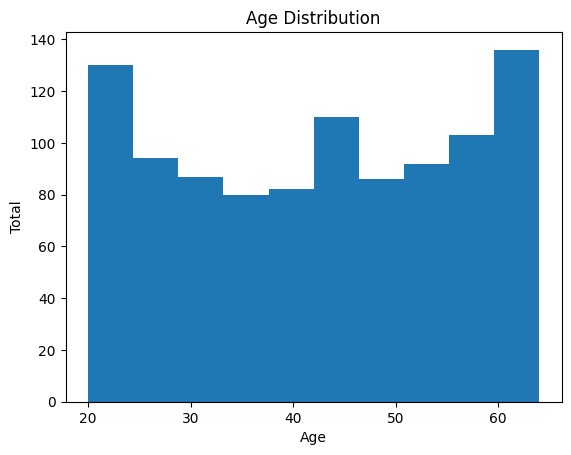

In [67]:
# Age distribution
plt.hist(data['Age'])
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Total')
plt.show()

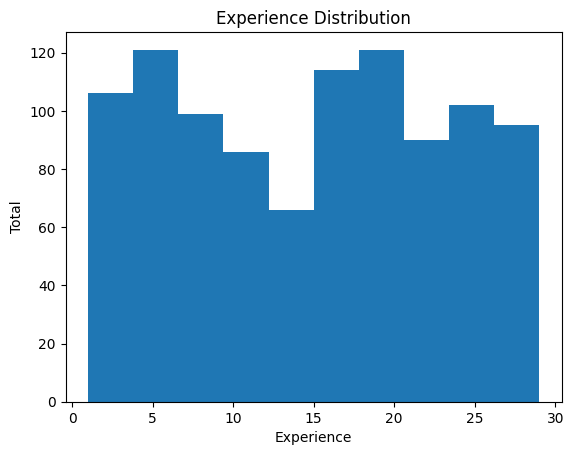

In [68]:
# Experince distribution
plt.hist(data['Experience'])
plt.title('Experience Distribution')
plt.xlabel('Experience')
plt.ylabel('Total')
plt.show()

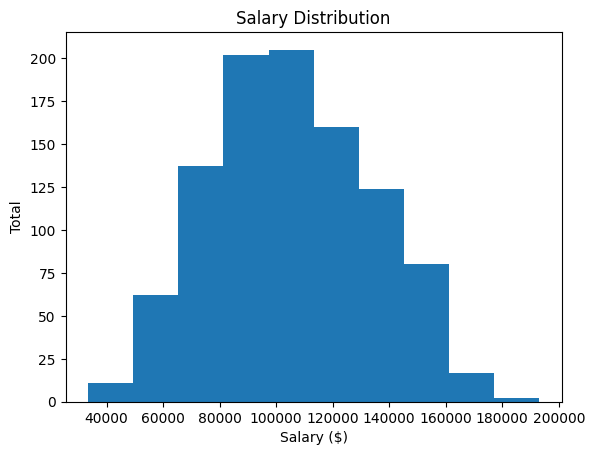

In [69]:
# Salary distribution
plt.hist(data['Salary'])
plt.title('Salary Distribution')
plt.xlabel('Salary ($)')
plt.ylabel('Total')
plt.show()

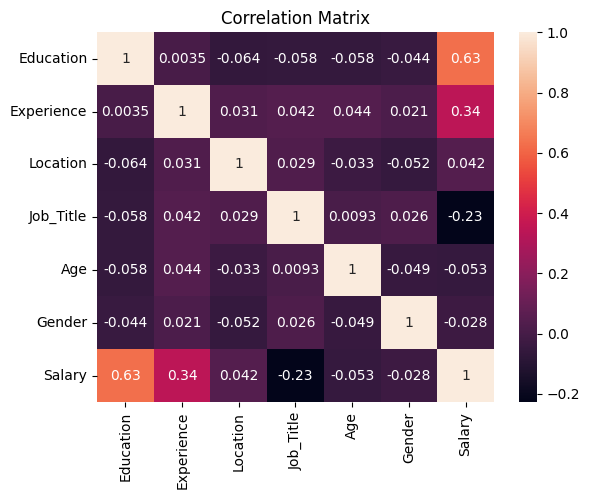

In [70]:
# Correlations
sns.heatmap(data.corr(method='pearson'), annot=True)
plt.title('Correlation Matrix')
plt.show()

In [71]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import mean_absolute_error, root_mean_squared_error, r2_score

In [72]:
# Feature selection
feature = data[['Gender', 'Age', 'Education', 'Experience']]
label = data['Salary']

Evaluation Result for - LinearRegression
RMSE: 19571.825683681203
MAE: 16174.310762435656
R2: 0.5308709091974877


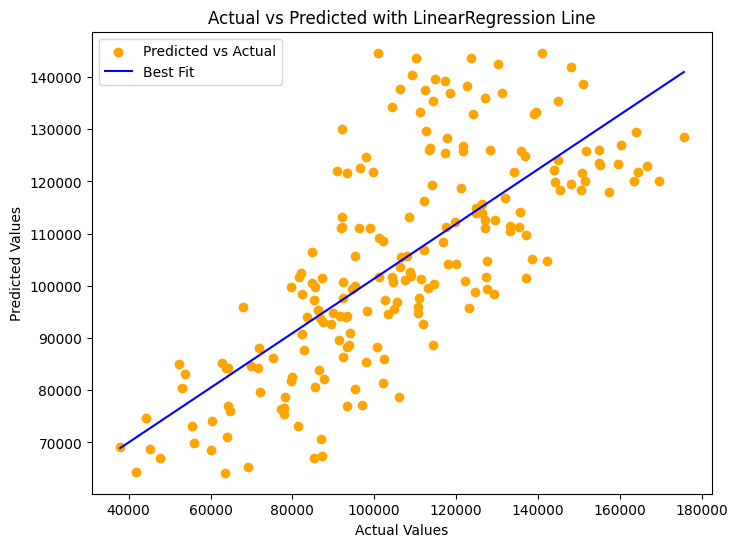

Evaluation Result for - DecisionTreeRegressor
RMSE: 20443.83115931029
MAE: 16539.420123232583
R2: 0.488136387407061


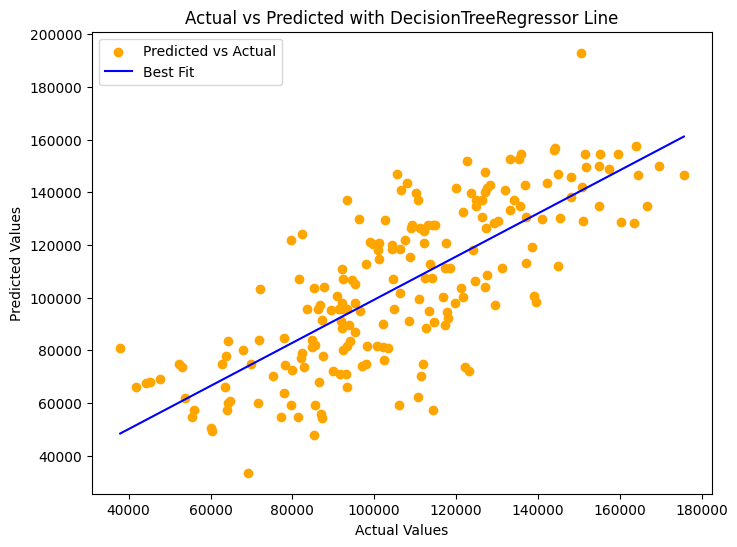

Evaluation Result for - SVR
RMSE: 28684.200333484852
MAE: 23119.94806474668
R2: -0.0076626941781465785


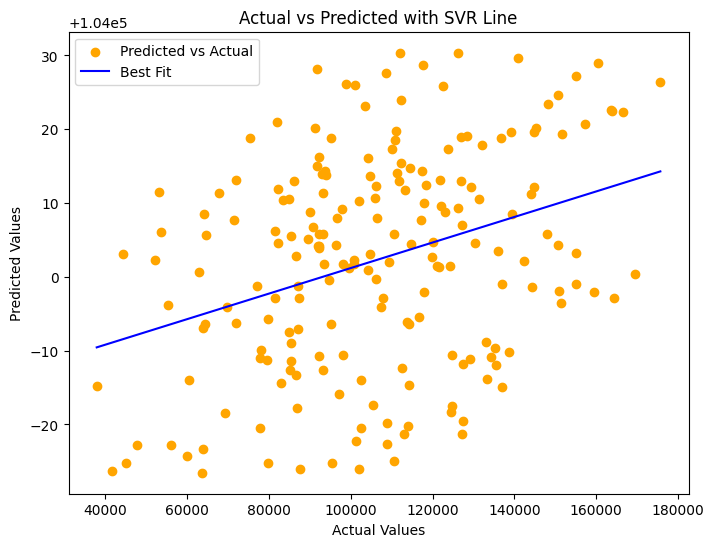

Evaluation Result for - KNeighborsRegressor
RMSE: 22294.888461021776
MAE: 18035.6863301232
R2: 0.3912481496795195


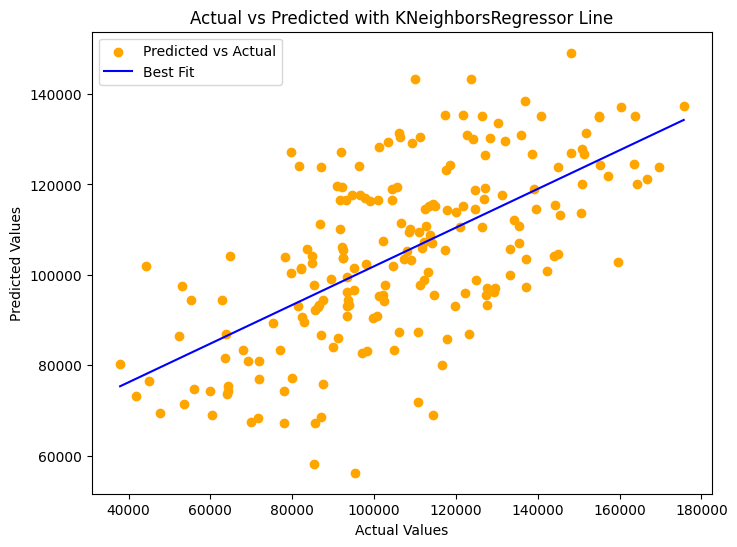

Evaluation Result for - RandomForestRegressor
RMSE: 16048.617650464215
MAE: 13157.28984732704
R2: 0.6845685829082199


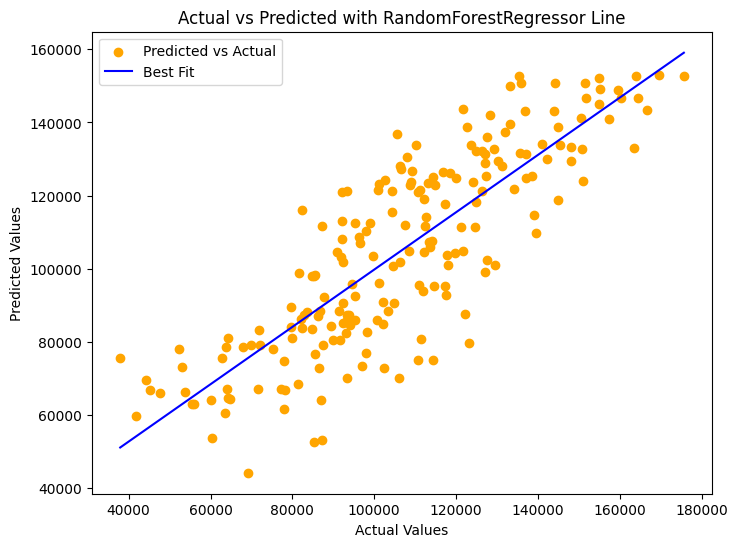

Evaluation Result for - MLPRegressor
RMSE: 104467.41962640858
MAE: 100584.74069423719
R2: -12.365691158533938


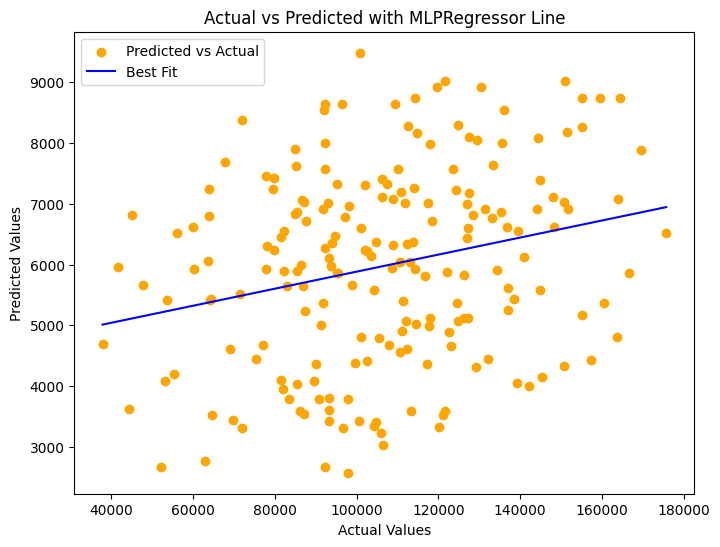

In [73]:
estimators = {
    'LinearRegression': LinearRegression(),
    'DecisionTreeRegressor': DecisionTreeRegressor(),
    'SVR': SVR(),
    'KNeighborsRegressor': KNeighborsRegressor(),
    'RandomForestRegressor': RandomForestRegressor(),
    'MLPRegressor': MLPRegressor()
}

# Split the data
X_train, X_test, y_train, y_test = train_test_split(feature, label, test_size=0.2, random_state=42)

for name, model in estimators.items():
    model.fit(X_train, y_train)
    pred = model.predict(X_test)

    # Model evaluations
    print(f'Evaluation Result for - {name}')
    print(f'RMSE: {root_mean_squared_error(y_test, pred)}')
    print(f'MAE: {mean_absolute_error(y_test, pred)}')
    print(f'R2: {r2_score(y_test, pred)}')

    slope, intercept, r, p, std_err = stats.linregress(y_test, pred)

    def myfunc(x):
        return slope * x + intercept

    x_line = np.linspace(min(y_test), max(y_test), 100)
    y_line = myfunc(x_line)

    # Plot the actual vs predicted
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, pred, color='orange', label='Predicted vs Actual')
    plt.plot(x_line, y_line, color='blue', label=f'Best Fit')

    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title(f'Actual vs Predicted with {name} Line')
    plt.legend()
    plt.show()